**Lovo Alessandro**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns

The **scope of the present project** is to illustrate **how to recover a binary signal from noisy observations
using Markov Chain Monte Carlo techniques.**

## **Binary signal recovery via maximum likelihood estimate**


**Mathematical Model**
* how can we generate data:


Let:

*  $\mathbf{X} \in \mathbb{R}^{m \times d}$ be a random matrix with i.i.d. entries drawn from $\mathcal{N}(0,1)$.
*  $\boldsymbol{\xi} \in \mathbb{R}^m$ be a noise vector with i.i.d. entries drawn from $\mathcal{N}(0,1)$, independent of $\mathbf{X}$.
*  $\Theta = \{0,1\}^d$ be the signal space.
*  $\boldsymbol{\theta} \in \Theta$ be a signal chosen uniformly at random, independent of $(\mathbf{X}, \boldsymbol{\xi})$.

The measurement vector $\mathbf{y} \in \mathbb{R}^m$ is generated as:

$$\mathbf{y} = \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\xi}$$



**Example**: $\theta$ represents a binary signal that we want to transmit or recover. The matrix $\mathbf{X}$ could represent a sensor system that detects the signal, while $\boldsymbol{\xi}$ represents the noise that inevitably introduces itself into the measurement process. The result $\mathbf{y}$ is therefore what the sensors detect, a mix of the true signal and the noise.

In [2]:
def generate_data(m, d):
  X = np.random.randn(m, d)
  # We generate the X matrix from a Std. Normal distrib.
  #(m,d) are:
  # m is the number of measurements
  # d is the dimension of the signal
  xi = np.random.randn(m)
  # xi rappreent the noise, we generate again from a std. Normal distrib.
  theta = np.random.randint(2, size=d)
  # rappresent the signal, that have as parameters
  # 2 that rappresent the values that theta can assume (0,1)
  # and d that is the dimension of the signal
  y = X @ theta + xi
  # rappresent the measurements
  return X, y, theta

**How can we estimate $\boldsymbol{\theta} \in \Theta$ ?**



* **Maximum likelihood estimation**

"It provides a measure of the plausibility of each parameter value, given the observed sample, and takes higher values for more plausible parameter values."

So we have to find the **vector $\theta$ that maximizes the likelihood of the observations $y$.**

The maximum likelihood estimate $ \hat{\theta} $ is given by the value of $ \theta $ that maximizes the likelihood function:

$\mathcal{L}(X, y; \theta) = \frac{\exp \left\{-\frac{1}{2} (y - X\theta)^T (y - X\theta)\right\}}{(2\pi)^{m/2}}$

which is equivalent to minimizing the function $\log L(X, y; \theta) = -\frac{1}{2} (y - X\theta)^T (y - X\theta) - \frac{m}{2} \log(2\pi)
$

We can work with the natural logarithm of the likelihood function, since the logarithm is a monotonic increasing function.

* **quantify the error between observations and model predictions**:

$\mathcal{H}(X, y; \theta) = (y - X\theta)^T (y - X\theta)$

In [3]:
def H(X, y, theta):
  return (y - X @ theta).T @ (y - X @ theta)

**Metropolis-Hastings Algorithm**

Why we use it in this problem ?

is used to sample from a complex probability distribution, in this case, to find the maximum likelihood estimator $\hat{\theta}$. This **method is useful when the parameter space is large** ($\Theta = \{0,1\}^d$), and the objective function (the likelihood function) is difficult to optimize directly.


* **Explore the Solution Space**: The algorithm samples different candidate vectors $\theta$.

* **Maximize the Likelihood**: It finds the vector $\theta$ that minimizes the quadratic error between $\mathbf{y}$ and $\mathbf{X} \theta$.

So we construct the Metropolis-Hastings (discrete-time) Markov
chain, with:

The stationary distribution $ \pi_{\beta}(\theta) $ is defined as:

$ \pi_{\beta}(\theta) = \frac{e^{-\beta H(X;y;\theta)}}{Z_{\beta}}, \quad \text{with} \quad Z_{\beta} = \sum_{\theta \in \Theta} e^{-\beta H(X;y;\theta)}$

$\pi_{\beta}(\theta)$ is a probability distribution over the possible states $\theta$ in your state space $\Theta$.




**The structure of the Markov chain we obtain with the Metropolis-Hastings algorithm is characterized by:**

* **States**: Each state represents a possible configuration of the vector $\theta$.

* **Convergence**: After a sufficient number of iterations, the chain converges to the maximum likelihood distribution, MLE $\hat{\theta}$.
Also with $\beta$ large enough.







In [4]:
def metropolis_hastings(X, y, beta, N, theta_init):
  # we have: 1. x data matrix 2. vector of observe data 3. temperature parameter of the algorithm (crucial role in determining the acceptance probability of proposed states...)
  #4. N number of steps of the algorithm 5. Theta_init: initial state of theta vector

    d = theta_init.shape[0] # dimension of the theta vector
    theta = theta_init.copy() #copy of the initial state of thera

    # ITERATION LOOP
    for t in range(N):
      # loop that exectutes N iterarion
        i = np.random.randint(d)
        # at each iteration select a random index i between 0 and d-1 (10 values)

        #PROPOSAL OF NEW STATES
        theta_proposal = theta.copy() #create  a copy of theta = theta_proposal
        theta_proposal[i] = 1 - theta_proposal[i]
        #We initialize the value of theta, inverts the value of index i (0 becomes 1 and viceversa)
        #Propose new states by changing the current one
        #Change one value per iteration

        #COMPUTE THE ENERGY FUNCTION
        H_current = H(X, y, theta)
        #Calculate H for the current state
        H_proposal = H(X, y, theta_proposal)
        #Calculate H for the proposed state

        #COMPUTE THE ACCEPTANCE RATIO
        acceptance_ratio = min(1, np.exp(-beta * (H_proposal - H_current)))
        ################################################################
        ## If the proposed state has a lower H value, it is accepted. ##
        ################################################################
        #We definitely update if the new H is smaller, since we want to minimize it

        #DECISION TO ACCEPT THE NEW STAGE
        if np.random.rand() < acceptance_ratio:
        # generate at random number between 0 and 1
        # if this number is less than the acceptance ratio, accept the new state and update theta
        # with theta proposal
            theta = theta_proposal
    return theta # the configuration of theta after N iterations

Now we have to we analyze the **mean
squared error**, in order to check the quality of our estimation:

$$
\xi = \mathbb{E}\left[ (\hat{\theta} - \theta)^T (\hat{\theta} - \theta) \right]
\quad
$$

**Why we use the MSE in this problem?**

* **PERFORMANCE EVALUATION**: how well the estimated $\theta_{est} $ vector approximates the true $\theta_{true}$ vector.

* **MEASURE ACCURACY**: provides a single numerical value representing the sum of the squared deviations of the estimates from the true values. Smaller MSE values indicate that the estimated vector is closer to the true vector, meaning the algorithm performed well.

In [5]:
def mean_squared_error(theta_true,theta_est):
  # theta_true: The true θ vector, representing the actual or theoretical configuration of parameters.
  # theta_est: The estimated θ vector, which is the result of the Metropolis-Hastings algorithm.
    residuals = theta_est - theta_true
  # residuals is the difference between the estimated values and the real one
    return np.dot(residuals.T,residuals) # dot product of the residuals with themselves calculates the sum of the squared residuals.

## **Algorithm procedure**

1. Set $\boldsymbol{\theta}_0 = \bar{\boldsymbol{\theta}}$.
2. For $t = 1, 2, \ldots, N - 1$:
   1. Pick $i$ uniformly at random in $\{1, 2, \ldots, d\}$.
   2. Let the proposed state be $\boldsymbol{\theta}^* \in \Theta$, with entries $\boldsymbol{\theta}^*(j) = $
      \begin{cases}
          \boldsymbol{\theta}^{t-1}(j) & \text{if } j \neq i \\
          1 - \boldsymbol{\theta}^{t-1}(j) & \text{if } j = i
      \end{cases}
    
    for $ j = 1, 2, \ldots, d. $
   3. Set
      $\boldsymbol{\theta}^t = $
      
      \begin{cases}
          \boldsymbol{\theta}^* & \text{with probability } \min\left\{1, \frac{\exp\{-\beta H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}^*)\}}{\exp\{-\beta H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}^{t-1})\}}\right\} \\
          \boldsymbol{\theta}^{t-1} & \text{with probability } 1 - \min\left\{1, \frac{\exp\{-\beta H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}^*)\}}{\exp\{-\beta H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}^{t-1})\}}\right\}
      \end{cases}

* **Now we have to find $\beta$**, but why ?

The parameter $\beta$ in the context of the Metropolis-Hastings algorithm represents an "inverse temperature" factor that controls the concentration of the stationary probability distribution $\pi_{\beta}(\theta)$.

**High $\beta$**: The **chain is more concentrated around the maximum of the likelihood function**, meaning the proposed solutions are **closer to the optimal value**.

**A high $\beta$ increases the probability of accepting states that improve the result (minimize $\mathcal{H}(X, y; \theta)$), making the chain more deterministic.**


**Low $\beta$**: The distribution is more uniform, allowing for greater exploration of the solution space.




1. **Initial Parameter Definition**:
* **d**: Dimension of the signal vector.
* **ms**: A range of values from 1 to 15 representing different numbers of measurements (m) to consider.
* **$\beta$**: An array containing 5 values uniformly distributed between 0.1 and 3.0, which are the beta parameters used in the Metropolis-Hastings algorithm.
* **N**: Number of iterations for each run of the Metropolis-Hastings algorithm.
* **M**: Number of independent realizations for each combination of m and beta.

In [6]:
d = 10  #dimension of the signal vector
ms = range(1, 16)  #we evaluates differents values of m (number of measurements)
beta = np.linspace(0.1, 3.0, 5)  #Control parameter for the Metropolis-Hastings algorithm
N = 100  #iterations for the Metropolis-Hastings algorithm
M = 1000  #Number of independent realizations

2. **Initialization of data structure**
3. **Calculation of Mean Squared Error for Different beta and m**

In [7]:
mse_results = {}
# we initialize a dictionary to store MSE values for different values of Beta.
# each key in this dictionary correspond to a value of Beta,
# and the associated value is a list of MSE for different values of m
mse_values = []
# temporary list to store MSE values for each Beta

#Calculate MSE for different values of beta and m
for b in beta:
  # iterate over each value of Beta
    mse_values = []  #List to store MSE values for each beta
    for m in ms:
      #iterate over each value of m
        errors = []

        #GENERATE DATA AND INITIALIZE VARIABLES
        for _ in range(M):
            X, y, theta_true = generate_data(m, d)
            #Generate data with m samples and d features, theta_true is what we are trying to recover
            theta_init = np.random.randint(0, 2, d)
            #Randomly initialize theta vector with values 0 or 1

            #ESTIMATE THETA USING M-H
            theta_est = metropolis_hastings(X, y, b, N, theta_init)
            #Estimate theta using Metropolis-Hastings

            #CALCULATE STANDARD ERROR
            error = mean_squared_error(theta_true, theta_est)  #Calculate mean squared error
            errors.append(error)  #Add the error to the list of errors

        #COMPUTE MEAN MSE FOR CURRENT M
        mse = np.mean(errors)  #Calculate the mean of errors for the current value of m
        mse_values.append(mse)  #Add MSE to the list of MSE values

    #STORE RESULTS FOR CURRENT BETA
    mse_results[b] = mse_values  #Save results for the current beta

**With multiple measurements, the random noise ξ tends to be averaged out**, reducing its impact compared to the true signal θ. This results in an estimate of θ that is less affected by random noise fluctuations, thereby further reducing the mean squared error (MSE).

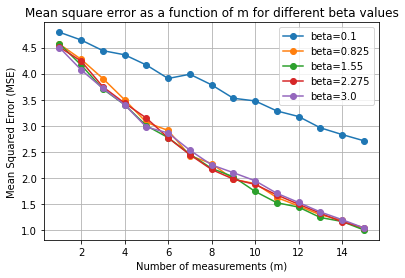

In [8]:
for b in beta:
    plt.plot(ms, mse_results[b], marker='o', label=f'beta={b}')
plt.xlabel('Number of measurements (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean square error as a function of m for different beta values')
plt.legend()
plt.grid(True)
plt.show()

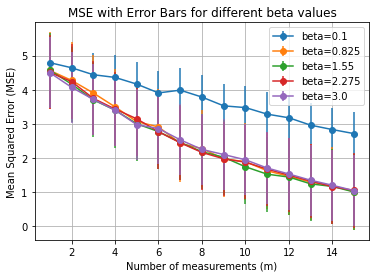

In [9]:
for b in beta:
    plt.errorbar(ms, mse_results[b], yerr=np.std(mse_results[b]), marker='o', label=f'beta={b}')
plt.xlabel('Number of measurements (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE with Error Bars for different beta values')
plt.legend()
plt.grid(True)
plt.show()




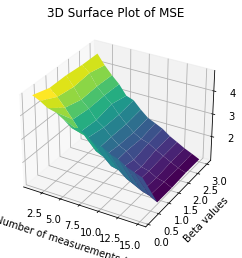

In [10]:
from mpl_toolkits.mplot3d import Axes3D

ms_grid, beta_grid = np.meshgrid(ms, beta)
mse_grid = np.array([mse_results[b] for b in beta])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(ms_grid, beta_grid, mse_grid, cmap='viridis')
ax.set_xlabel('Number of measurements (m)')
ax.set_ylabel('Beta values')
ax.set_zlabel('MSE')
plt.title('3D Surface Plot of MSE')
plt.show()



As expected, **as the value of beta increases, MSE decreases**.

----------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

Now we want to verify, **fixing the value of Beta and varying M (NUMBER OF REALIZATION), how MSE is influenced**.

*  We fix $\beta$=1.0
* we let vary M from 100 to 5000

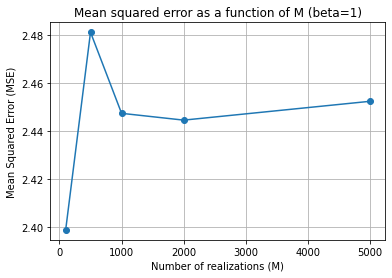

In [11]:
def calculate_mse_vs_M(ms, M_values, beta=1, N=100, d=10):
    mse_values = []

    for M in M_values:
        errors = []
        for m in ms:
            for _ in range(M):
                X, y, theta_true = generate_data(m, d)
                theta_init = np.random.randint(0, 2, d)
                theta_est = metropolis_hastings(X, y, beta, N, theta_init)
                error = mean_squared_error(theta_true, theta_est)
                errors.append(error)

        mse = np.mean(errors)
        mse_values.append(mse)

    return mse_values

# Example usage:
ms = range(1, 16)  # Number of measurements
M_values = [100, 500, 1000, 2000, 5000]  # Different values of M (number of realizations)
beta = 1  # Fixed value of beta
N = 100  # Number of iterations for Metropolis-Hastings
d = 10  # Dimension of the signal vector

mse_values = calculate_mse_vs_M(ms, M_values, beta, N, d)

# Plotting the results
plt.plot(M_values, mse_values, marker='o')
plt.xlabel('Number of realizations (M)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title(f'Mean squared error as a function of M (beta={beta})')
plt.grid(True)
plt.show()


* **From the observation of the graph we can say**:


1. **MSE Trend**:

The graph clearly shows **how the MSE varies with M**. In this specific case, it appears that the MSE decreases up to a certain point (around M=2000) and then tends to stabilize or slightly increase.

2. **Precision Optimization**:

Increasing the number of realizations M initially leads to a reduction in MSE. This suggests that increasing realizations can improve the precision of estimates obtained from the Metropolis-Hastings algorithm.

3. **Law of Diminishing Returns**:

However, beyond a certain point, the MSE may exhibit diminishing returns, meaning that further increases in M may not lead to significant improvements or could even cause a slight increase in MSE. This could indicate that beyond a certain number of realizations, the benefits in improving precision diminish.

4. **Optimization Point**:

The graph suggests that M=2000 could be a good starting point for achieving a balance between estimation precision and computational cost. However, to determine if it is the optimal minimum point, it would be beneficial to explore a wider range around this value and evaluate how MSE behaves.




--------------------------------------------------------------------------------

Now we want determine the **minimum value of m** for which the **MSE is sufficiently low**


This is useful for evaluating the **"reliability" of signal recovery** $\theta$.

**Aim**: identify the **minimum value of
𝑚 that allows for the recovery of the signal $\theta$** with an MSE below a predefined threshold.

In [12]:
threshold_mse = 1.0
#Arbitrary threshold to consider the estimate reliable (used to determine the reliability of the signal recovery)
reliable_m_indices = [i for i, mse in enumerate(mse_values) if mse < threshold_mse]
#create a list of indices reliable_m_indices where the MSE values are LESS than the defined threshold (1.0)
#It iterates over the list mse_values and checks if each MSE value is below the threshold,
#storing the indices of those that are.

#If reliable indices are found, it retrieves the first one, which corresponds to the smallest
#m value that meets the reliability condition.
if reliable_m_indices:
    min_m = ms[reliable_m_indices[0]]
    print(f"Minimum value of m/d to reliably recover theta: {min_m/d:.2f}")
    # print value of m for wich MSE is below the threshold
else:
    print("No value of m was found for which the MSE is below the threshold.")
    # if we have not values of m for wich MSE is below the threshold

No value of m was found for which the MSE is below the threshold.


The graph shows how the MSE threshold needs to be adjusted to find the minimum
𝑚value (expressed as m/d) that ensures reliable signal recovery.

**It highlights the critical threshold beyond which we can achieve reliable recovery, and the corresponding m/d ratio.**

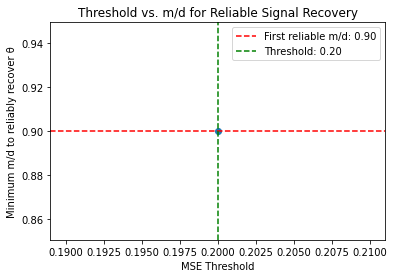

In [13]:
import matplotlib.pyplot as plt

# Example data
mse_values = [2.0, 1.8, 1.5, 1.2, 0.9, 0.7, 0.5, 0.3, 0.1]  # Example MSE values
ms = list(range(1, len(mse_values) + 1))  # Example m values
d = 10  # Example d value for normalization

# Prepare lists to store thresholds and corresponding m/d values
thresholds = []
m_over_d_values = []

# Start with an initial threshold
threshold_mse = 0.0
threshold_increment = 0.1

# Incrementally increase the threshold
while True:
    reliable_m_indices = [i for i, mse in enumerate(mse_values) if mse < threshold_mse]
    if reliable_m_indices:
        min_m = ms[reliable_m_indices[0]]
        thresholds.append(threshold_mse)
        m_over_d_values.append(min_m / d)
        break
    thresholds.append(threshold_mse)
    m_over_d_values.append(None)
    threshold_mse += threshold_increment

# Plotting the results
plt.plot(thresholds, m_over_d_values, marker='o')
plt.xlabel('MSE Threshold')
plt.ylabel('Minimum m/d to reliably recover θ')
plt.title('Threshold vs. m/d for Reliable Signal Recovery')
plt.axhline(y=m_over_d_values[-1], color='r', linestyle='--', label=f'First reliable m/d: {m_over_d_values[-1]:.2f}')
plt.axvline(x=thresholds[-1], color='g', linestyle='--', label=f'Threshold: {thresholds[-1]:.2f}')
plt.legend()
plt.show()
